In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import os, cv2
%matplotlib inline
from matplotlib.pyplot import imshow
from glob import glob
from tqdm import tqdm

device = 'cuda'
mtcnn = MTCNN(keep_all=True, device=device)

In [2]:


new_img_dir = '/opt/ml/input/ttest'
img_path = '/opt/ml/input/data/train/images'

cnt = 0

for paths in os.listdir(img_path):
    if paths[0] == '.': continue
    
    sub_dir = os.path.join(img_path, paths)
    
    for imgs in os.listdir(sub_dir):
        if imgs[0] == '.': continue
        
        img_dir = os.path.join(sub_dir, imgs)
        img = cv2.imread(img_dir)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        #mtcnn 적용
        boxes,probs = mtcnn.detect(img)
        # print('model')
        # boxes 확인
        if isinstance(boxes, np.ndarray): 
            # print(boxes)
            cv2.rectangle(img, boxes, (255,0,0), 2)
            # imshow(img)
            # plt.show()
            # break
        if not isinstance(boxes, np.ndarray):
            print('Nope!')
            # 직접 crop
            img=img[100:400, 50:350, :]
        
        # boexes size 확인
        else:
            xmin = int(boxes[0, 0])-30
            ymin = int(boxes[0, 1])-30
            xmax = int(boxes[0, 2])+30
            ymax = int(boxes[0, 3])+30
            
            if xmin < 0: xmin = 0
            if ymin < 0: ymin = 0
            if xmax > 384: xmax = 384
            if ymax > 512: ymax = 512
            
            img = img[ymin:ymax, xmin:xmax, :]
            
        tmp = os.path.join(new_img_dir, paths)
        cnt += 1
        # plt.imsave(os.path.join(tmp, imgs), img)
        
print(cnt)

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [3]:
i = 0

[125.58018 187.48029 246.9909  325.41925] [0.96371657]
181 213
291


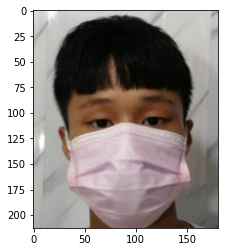

In [391]:
i+=1
dataroot = '/opt/ml/input/purified/train/0'
all_imgs = glob(f'{dataroot}/*.*')
img = cv2.imread(all_imgs[i])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# bias = -30
# W = 384
# H = 512
# cr_size = 350
# cr_w = int((W-cr_size)/2)
# cr_h = int((H-cr_size)/2) + bias
# img = img[cr_h:cr_h+cr_size, cr_w:cr_w+cr_size]
# print(img.shape)

#mtcnn 적용
foc = 0
boxes,probs = mtcnn.detect(img)
print(boxes[0], probs)
if isinstance(boxes, np.ndarray): 
    # print(boxes)
    boxes = boxes[0]
    rect = (int(boxes[0]), int(boxes[1]), int(boxes[2]-boxes[0]), int(boxes[3]-boxes[1]))
    # cv2.rectangle(img, rect, (255,0,0), 2)
    bias = 30
    _h = int(boxes[1]) - int(bias*2)
    h_ = int(boxes[3]) + int(bias/2)
    _w = int(boxes[0]) - bias
    w_ = int(boxes[2]) + bias
    ww, hh = w_ - _w, h_-_h
    print(ww, hh)
    if (ww < 162 or 290 < ww) or (hh < 192 or 363 < hh):
        foc += 1
    print(i)
    img = img[_h:h_, _w:w_]
    # img = img[int(boxes[1]):int(boxes[3]-boxes[1]) , int(boxes[0]):int(boxes[2]-boxes[0])]
    imshow(img)
    plt.show()
else:
    imshow(CentCrop(img))
    

In [69]:
bias = -50
W = 384
H = 512
cr_size = 320
cr_w = int((W-cr_size)/2)
cr_h = int((H-cr_size)/2) + bias

def CentCrop(img):
    img = img[cr_h:cr_h+cr_size, cr_w:cr_w+cr_size]
    return img

In [79]:
i = 0
dataroot = '/opt/ml/input/purified/train/0'
all_imgs = glob(f'{dataroot}/*.*')

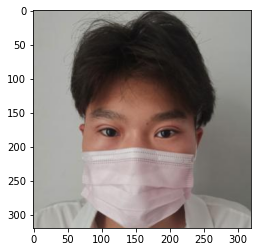

In [108]:
i += 1
img = cv2.imread(all_imgs[i])
img = CentCrop(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imshow(img)

In [395]:
dataroot = '/opt/ml/input/purified/train/0'
all_imgs = glob(f'{dataroot}/*.*')
tot = len(all_imgs)
find = 0
nf = 0
foc = 0
hs = []
ws = []
_hs = []
h_s = []
_ws = []
w_s = []
for im_path in tqdm(all_imgs):
    img = cv2.imread(im_path)
    img = CentCrop(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    boxes,probs = mtcnn.detect(img)
    # print(boxes)
    bias = 30
    
    if isinstance(boxes, np.ndarray): 
        find += 1
        boxes = boxes[0]

        _h = int(boxes[1]) - int(bias*2)
        h_ = int(boxes[3]) + int(bias/2)
        _w = int(boxes[0]) - bias
        w_ = int(boxes[2]) + bias
        _hs.append(_h)
        h_s.append(h_)
        _ws.append(_w)
        w_s.append(w_)

        hs.append(h_-_h)
        ws.append(w_-_w)
        ww, hh = w_ - _w, h_-_h
        # print(ww, hh)
        if (ww < 162 or 290 < ww) or (hh < 192 or 363 < hh):
            foc += 1
    else:
        nf += 1
    
print(f'{find/tot * 100:.2f}%')
print(f'{foc/tot * 100:.2f}%\t\t{foc}/{tot}')
# print(f'hs: {hs}')
# print(f'ws: {ws}')

100%|██████████| 2745/2745 [01:07<00:00, 40.49it/s]

97.63%
4.88%		134/2745


In [394]:
print(f'{(foc+nf)/tot*100: .2f}%')

 7.25%


In [380]:
from collections import Counter
cnt_h = Counter(hs)
cnt_w = Counter(ws)
# cnt_w

In [384]:
hmean=np.array(hs).mean()
hstd =np.array(hs).std()

wmean=np.array(ws).mean()
wstd =np.array(ws).std()
print(wstd)


32.00453559057268


In [401]:
sig = 2 #95.45
print(wmean-sig*wstd,wmean+sig*wstd) 
print(hmean-sig*hstd,hmean+sig*hstd) 

print(wmean, hmean)

162.49130195318298 290.50944431547373
192.04684451907178 363.18151368988345
226.50037313432836 277.6141791044776


In [400]:
sig = 1.0

_wsm = np.array(_ws).mean() - sig*np.array(_ws).std()
w_sm = np.array(w_s).mean() + sig*np.array(w_s).std()

_hsm = np.array(_hs).mean() - sig*np.array(_hs).std()
h_sm = np.array(h_s).mean() + sig*np.array(h_s).std()

print(_wsm, w_sm, _hsm, h_sm)

21.467482443942714 286.29483872792855 -4.662752168653078 354.0372812146069
